In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [26]:
WB_B_t0_adv = np.load('../AdvGAN/samples/WB-B-t0-adv.npy')
WB_B_t0_clean = np.load('../AdvGAN/samples/WB-B-t0-clean.npy')
WB_B_t0_label = np.load('../AdvGAN/samples/WB-B-t0-label.npy')
print(WB_B_t0_label.shape)
print(WB_B_t0_label[img])

(50789,)
2


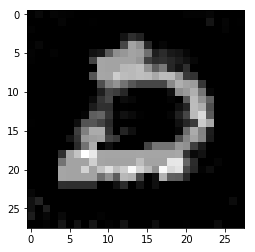

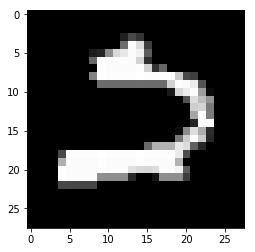

In [10]:
img = 35
plt.figure()
plt.imshow((WB_B_t0_adv[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.show()
plt.close()
plt.figure()
plt.imshow((WB_B_t0_clean[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.show()
plt.close()

# 1000-defense-gan

In [14]:
WB_B_t0_defensegan = np.load('results/reconstruct-1000/WB-B-t0-adv-defensegan-1000.npz')['arr_0']

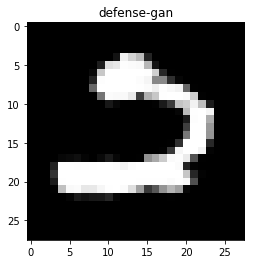

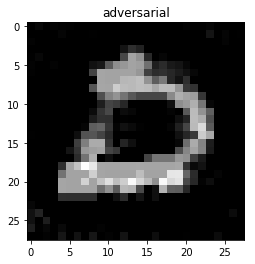

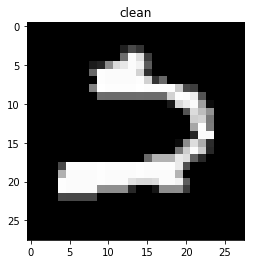

In [16]:
img = 35
plt.figure()
plt.imshow((WB_B_t0_defensegan[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.title('defense-gan')
plt.show()
plt.close()
plt.figure()
plt.imshow((WB_B_t0_adv[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.title('adversarial')
plt.show()
plt.close()
plt.imshow((WB_B_t0_clean[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.title('clean')
plt.show()
plt.close()

## CNN

In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/gunmachine/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 410us/step - loss: 0.2573 - acc: 0.9203 - val_loss: 0.0614 - val_acc: 0.9793
Epoch 2/12
60000/60000 [==============================] - 19s 312us/step - loss: 0.0898 - acc: 0.9733 - val_loss: 0.0405 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 18s 293us/step - loss: 0.0667 - acc: 0.9798 - val_loss: 0.0388 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 19s 309us/step - loss: 0.0556 - acc: 0.9833 - val_loss: 0.0286 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 19s 311us/step - loss: 0.0485 - acc: 0.9859 - val_loss: 0.0290 - val_acc: 0.9916
Epoch 6/12
60000/60000 [==============================] - 17s 290us/step - loss: 0.0407 - acc: 0.9878 - val_loss: 0.0299 - val_acc: 0.9897
Epoch 7/12
60000/60000 [===================

## score

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026674703095892937
Test accuracy: 0.9919


In [27]:
WB_B_t0_label = keras.utils.to_categorical(WB_B_t0_label, num_classes)
score = model.evaluate(WB_B_t0_clean, WB_B_t0_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.009245609080383365
Test accuracy: 0.9973616334245604


In [28]:
score = model.evaluate(WB_B_t0_adv, WB_B_t0_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.605586216410258
Test accuracy: 0.16580361889385498


In [31]:
length = WB_B_t0_defensegan.shape[0]
score = model.evaluate(WB_B_t0_defensegan, WB_B_t0_label[:length], verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.27832848739624
Test accuracy: 0.602
